In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [18]:
df = pd.read_csv('/content/drive/MyDrive/Dataset/QuangNinh.csv')

In [28]:
# Convert the 'date' column to datetime format
df['date'] = pd.to_datetime(df['date'], format='%m/%d/%Y')
df = df[df['date'] < '2024-03-01']

df['AQI'] = df[['pm25', 'pm10', 'o3', 'no2', 'so2', 'co']].max(axis=1)

df

,Unnamed: 0,date,pm25,pm10,o3,no2,so2,co,AQI
0,1,2021-02-14,20,6,28,5,12,5,28
1,2,2021-02-15,9,14,28,9,12,5,28
2,3,2021-02-16,18,17,26,9,12,6,26
3,4,2021-02-17,20,24,26,15,12,6,26
4,5,2021-02-18,28,29,38,16,12,6,38
...,...,...,...,...,...,...,...,...,...
899,900,2024-02-25,5,8,6,6,7,6,8
900,901,2024-02-26,7,4,8,3,6,5,8
901,902,2024-02-27,4,12,4,11,9,6,12
902,903,2024-02-28,11,6,9,5,7,6,11


In [20]:
train_size = int(0.7 * len(df))
test_size = len(df) - train_size

train_data = df[:train_size]
test_data = df[train_size:]



In [21]:
X_train = train_data['Unnamed: 0']
X_test = test_data['Unnamed: 0']
y_train = train_data['AQI']
y_test = test_data['AQI']

X_test

632    633
633    634
634    635
635    636
636    637
      ... 
899    900
900    901
901    902
902    903
903    904
Name: Unnamed: 0, Length: 272, dtype: int64

In [22]:
import numpy as np
import matplotlib.pyplot as plt

def f(x, c0, c1, c2, c3, c4):
    return c0 * x**3 + c1 * x**2 + c2 * x + c3 + c4 * np.sin(x)



# Define the Jacobian matrix of partial derivatives for the polynomial function
def jacobian(x, c0, c1, c2, c3, c4):
    J = np.empty((x.size, 5))
    J[:, 0] = x**3  # Derivative with respect to c0
    J[:, 1] = x**2  # Derivative with respect to c1
    J[:, 2] = x     # Derivative with respect to c2
    J[:, 3] = 1     # Derivative with respect to c3
    J[:, 4] = np.sin(x)  # Derivative with respect to c4
    return J

# Gauss-Newton optimization
def Gauss_Newton(f, jacobian, X, y, initial_params, tol, max_iter):
    params = np.array(initial_params)
    for i in range(max_iter):
        residuals = y - f(X, *params)
        J = jacobian(X, *params)
        delta = np.linalg.lstsq(J, residuals, rcond=None)[0]
        params += delta
        if np.linalg.norm(delta) < tol:
            break
    return params



# Initial guess for the parameters
initial_params = [1.0, 1.0, 1.0, 1.0, 1.0]
tol = 1e-6
max_iter = 100

# Perform the Gauss-Newton optimization
estimated_parameters = Gauss_Newton(f, jacobian, X_train, y_train, initial_params, tol, max_iter)

estimated_parameters

array([-6.60610838e-07,  6.24156795e-04, -1.84675357e-01,  5.11257293e+01,
        7.08174006e-01])

In [23]:
# Calculate y_pred using the estimated parameters
y_pred = f(X_test, *estimated_parameters)

In [24]:
def calculate_errors(y_true, y_pred):
    MAE = np.mean(np.abs(y_true - y_pred))
    MAPE = np.mean(np.abs((y_true - y_pred) / (y_true + np.finfo(float).eps))) * 100
    RMSE = np.sqrt(np.mean((y_true - y_pred)**2))

    return MAE, MAPE, RMSE

y_pred = f(X_test, *estimated_parameters)

MAE, MAPE, RMSE = calculate_errors(y_test, y_pred)

print("Mean Absolute Error (MAE):", MAE)
print("Mean Absolute Percentage Error (MAPE):", MAPE)
print("Root Mean Square Error (RMSE):", RMSE)



Mean Absolute Error (MAE): 55.82363623535914
Mean Absolute Percentage Error (MAPE): 261.5393055615606
Root Mean Square Error (RMSE): 72.26275097443327


Estimated parameters: [-6.60610838e-07  6.24156795e-04 -1.84675357e-01  5.11257293e+01
  7.08174006e-01]


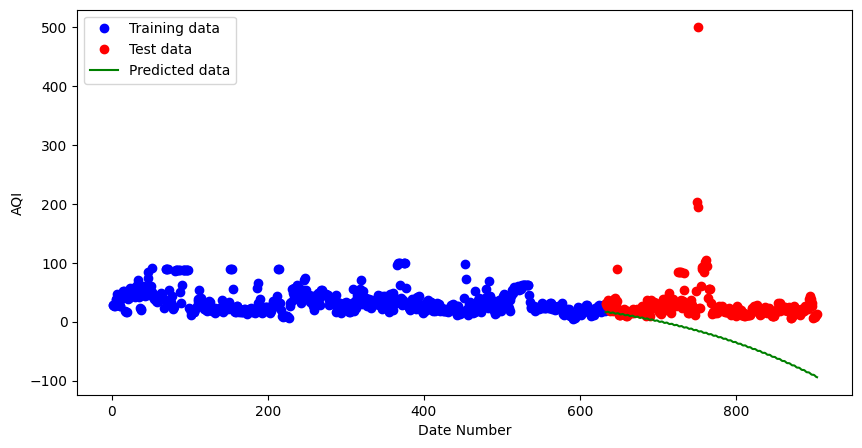

In [25]:
# Print estimated parameters and plot the results
print("Estimated parameters:", estimated_parameters)

plt.figure(figsize=(10, 5))
plt.plot(X_train, y_train, 'bo', label='Training data')
plt.plot(X_test, y_test, 'ro', label='Test data')
plt.plot(X_test, y_pred, 'g-', label='Predicted data')
plt.xlabel('Date Number')
plt.ylabel('AQI')
plt.legend()
plt.show()



In [26]:
last_value = X_test.iloc[-1]
start_index_day = last_value + 1

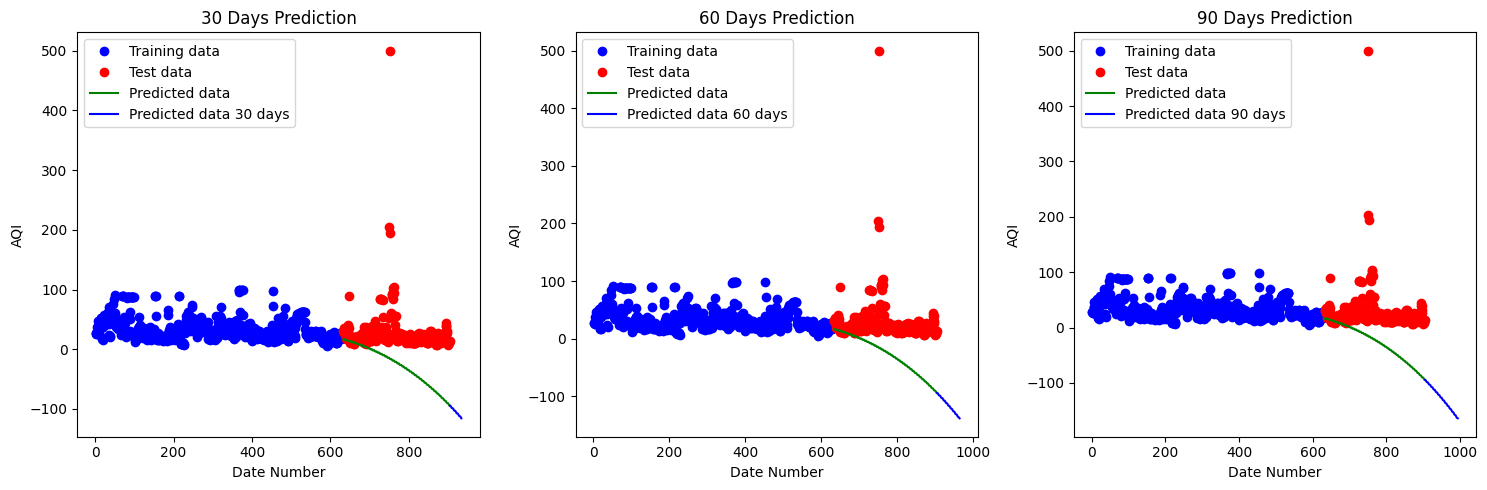

In [27]:

start_index_day = last_value + 1

X_predict_30 = pd.Series(range(start_index_day, start_index_day + 30))
X_predict_60 = pd.Series(range(start_index_day, start_index_day + 60))
X_predict_90 = pd.Series(range(start_index_day, start_index_day + 90))

# Assuming you have a function to make predictions based on your model
y_pred_60 = f(X_predict_60, *estimated_parameters)
y_pred_90 = f(X_predict_90, *estimated_parameters)
y_pred_30 = f(X_predict_30, *estimated_parameters)
# Now, plot the results
plt.figure(figsize=(15, 5))

# Plot for 30 days
plt.subplot(1, 3, 1)
plt.plot(X_train, y_train, 'bo', label='Training data')
plt.plot(X_test, y_test, 'ro', label='Test data')
plt.plot(X_test, y_pred, 'g-', label='Predicted data')
plt.plot(X_predict_30, y_pred_30, 'b-', label='Predicted data 30 days')
plt.title('30 Days Prediction')
plt.xlabel('Date Number')
plt.ylabel('AQI')
plt.legend()

# Plot for 60 days
plt.subplot(1, 3, 2)
plt.plot(X_train, y_train, 'bo', label='Training data')
plt.plot(X_test, y_test, 'ro', label='Test data')
plt.plot(X_test, y_pred, 'g-', label='Predicted data')
plt.plot(X_predict_60, y_pred_60, 'b-', label='Predicted data 60 days')
plt.title('60 Days Prediction')
plt.xlabel('Date Number')
plt.ylabel('AQI')
plt.legend()

# Plot for 90 days
plt.subplot(1, 3, 3)
plt.plot(X_train, y_train, 'bo', label='Training data')
plt.plot(X_test, y_test, 'ro', label='Test data')
plt.plot(X_test, y_pred, 'g-', label='Predicted data')
plt.plot(X_predict_90, y_pred_90, 'b-', label='Predicted data 90 days')
plt.title('90 Days Prediction')
plt.xlabel('Date Number')
plt.ylabel('AQI')
plt.legend()

plt.tight_layout()
plt.show()
